# CS171 - Spring 2019 - Assignment 1
### Instructor: Vagelis Papalexakis

In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [26]:
import numpy as np #use for genreate rand array on top of pandas
import pandas as pd #manipulate data
import matplotlib.pyplot as plt #chart plot diagram uses
import seaborn as sb
import random as rand
import math

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [27]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names) ##read cvs file such as spreadsheet data, with name label 
data.head() #show the intro of data, or tail() to show the end of data

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]


### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

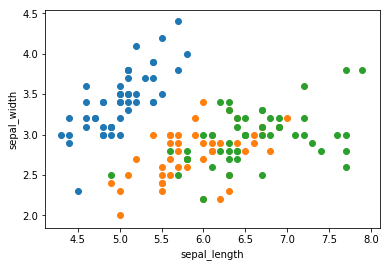

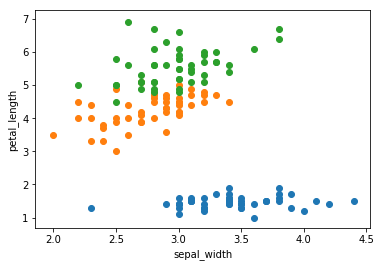

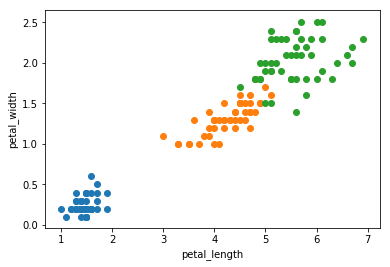

In [28]:
fig,Scat1 = plt.subplots()
Scat1.scatter(data.sepal_length[0:49], data.sepal_width[0:49])
Scat1.scatter(data.sepal_length[50:99], data.sepal_width[50:99])
Scat1.scatter(data.sepal_length[100:149], data.sepal_width[100:149])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
fig, Scat2 = plt.subplots()
Scat2.scatter(data.sepal_width[0:49], data.petal_length[0:49])
Scat2.scatter(data.sepal_width[50:99], data.petal_length[50:99])
Scat2.scatter(data.sepal_width[100:149], data.petal_length[100:149])
plt.xlabel("sepal_width")
plt.ylabel("petal_length")
fig, Scat3 = plt.subplots()
Scat3.scatter(data.petal_length[0:49], data.petal_width[0:49])
Scat3.scatter(data.petal_length[50:99], data.petal_width[50:99])
Scat3.scatter(data.petal_length[100:149], data.petal_width[100:149])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()


Your answer here:
2. petal_length and petal_width. these two are mostly on the same line, so they are more correlated

3. based on the length and width, we can figure out what kind of flower it is. We although green and orange are very similar, we can distinguish blue(flower) from other two

### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

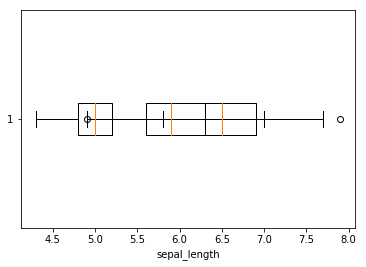

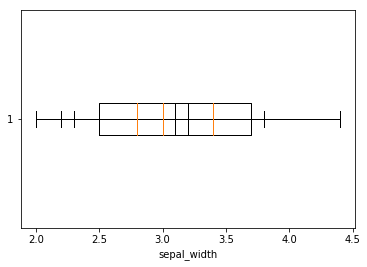

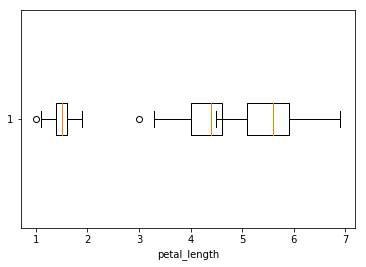

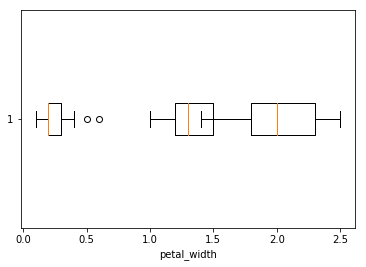

In [29]:
fig,Box1 = plt.subplots()
Box1.boxplot(data.sepal_length[0:49], vert=False)
Box1.boxplot(data.sepal_length[50:99],vert=False)
Box1.boxplot(data.sepal_length[100:149],vert=False)
plt.xlabel("sepal_length")
fig,Box2 = plt.subplots()
Box2.boxplot(data.sepal_width[0:49], vert=False)
Box2.boxplot(data.sepal_width[50:99],vert=False)
Box2.boxplot(data.sepal_width[100:149],vert=False)
plt.xlabel("sepal_width")
fig,Box3 = plt.subplots()
Box3.boxplot(data.petal_length[0:49], vert=False)
Box3.boxplot(data.petal_length[50:99],vert=False)
Box3.boxplot(data.petal_length[100:149],vert=False)
plt.xlabel("petal_length")
fig,Box4 = plt.subplots()
Box4.boxplot(data.petal_width[0:49], vert=False)
Box4.boxplot(data.petal_width[50:99],vert=False)
Box4.boxplot(data.petal_width[100:149],vert=False)
plt.xlabel("petal_width")
plt.show()

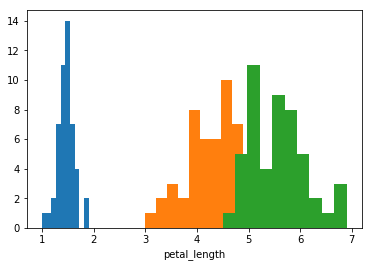

In [30]:
#Your answer here:
#2.   
plt.hist(data.petal_length[0:49]) #data 0-50, redcircle
plt.hist(data.petal_length[50:99]) 
plt.hist(data.petal_length[100:149]) 
plt.xlabel("petal_length") # set label name for x

plt.show() #output the diagram


3. Yes, Histogram gives us a clearification that blue(setosa)flower has shorter petal_length, and green flower has longer petal_length

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [31]:
#1.



#comparing dataset [0] and [100]
sum = 0;
difference =0;
for x in range (0,4):
    difference = abs(data.loc[0][x] - data.loc[100][x])
    sum += math.pow(difference,2)

print(math.sqrt(sum))



5.2848841046895245


In [32]:
#2.
print(np.linalg.norm(data.loc[0][0:4]-data.loc[100][0:4]))


5.2848841046895245


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

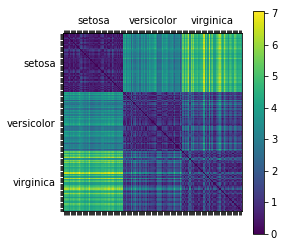

In [33]:
#1.your code here
#create 150 * 150 
data_size = len(data)
m = np.zeros((data_size, data_size)) 
##implement data into matrix
for x in range (0,data_size):
    for y in range (0,x):
        m[x][y] = np.linalg.norm(data.loc[x][0:4]- data.loc[y][0:4])
        m[y][x] = m[x][y]
        
##implement matrix
plt.matshow(m) 
flower = [''] * 150 #create label for x,y-axis
flower[25] = "setosa"
flower[75] = "versicolor"
flower[125] = "virginica"
x_pos = np.arange(len(flower))
plt.xticks(x_pos,flower)
y_pos = np.arange(len(flower))
plt.yticks(y_pos,flower)


plt.colorbar()
plt.show()



Your answer here:
3. since it is a inverse function graph, we only need half of the data computation. and minus the one that cancel itself. 
Original computation: 150*150 = 22500 
half of computation: 11250
take out the one that cancel itself( no difference): 11250-150 = 11100
minimum computation is 11100


4. yes, we can see that the different between setosa and virginica is the greatest in the matrix diagram. Value from the same class has small difference.

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

In [34]:
#your code here
#1.
def reservoir_sampling(stream,M):
    ##find the size of the stream
    stream_size =0
    for x in stream:
       stream_size+=1
    ##create a reservoir array with size M
    reservoir = [0] * M
    ##add data until reservoir is full
    for x in range (0, M): 
        reservoir[x] = stream[x]
    ##load data, if it is selected by chance, replace reservoir position, else do nothing
    for y in range (M, stream_size):
        j = rand.randint(0,y) 
        if j < M:
            reservoir[j] = stream[y]
    return reservoir


#reservoir = reservoir_sampling(data.petal_length,15)
#for x in range(0,15):
  #  print(reservoir[x])

1.4
4.2
5.6
4.9
1.3
3.9
4.7
1.5
5.9
4.5
3.3
5.8
5.9
4.5
3.9


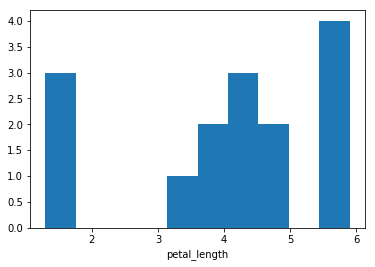

In [35]:
#2.
reservoir = reservoir_sampling(data.petal_length,15)

for x in range(0,15):
    print(reservoir[x])

plt.hist(reservoir[0:15]) #data 0-50, redcircle
plt.xlabel("petal_length") # set label name for x

plt.show() #output the diagram


### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

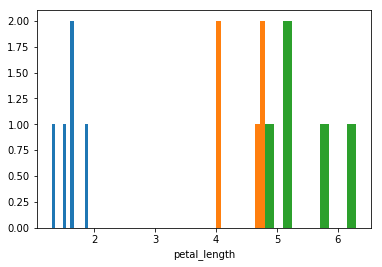

In [36]:
#your code here
#1.2.
#this reservoir function ise specialize of this problem, used to sample data without changing the index
def reservoir_for_stratified(stream,M,class_label):
    #find the class for correct starting index
    k=0
    if class_label == 2: ##verscolor
        k=50
    elif class_label == 3: #virginica
        k = 100
    ##find the size of the stream
    stream_size = len(stream)
    ##create a reservoir array with size M
    reservoir = [0] * M
    ##add data until reservoir is full
    for x in range (0, M): 
        reservoir[x] = stream.petal_length[x+k]
    ##load data, if it is selected by chance, replace reservoir position, else do nothing
    for y in range (M, stream_size):
        j = rand.randint(0,y) 
        if j < M:
            reservoir[j] = stream.petal_length[y+k]
    return reservoir



def stratified_sampling(stream, name):
    #classficy classes by label
    sclass = stream[data["label"]==name]
    return sclass
   # reservoir_sampling()

#stratified data
class1 = stratified_sampling(data, "Iris-setosa")
class2 = stratified_sampling(data, "Iris-versicolor")
class3 = stratified_sampling(data, "Iris-virginica")

#reservoir sampling
reservoir1 = reservoir_for_stratified(class1,5,1)
reservoir2 = reservoir_for_stratified(class2,5,2)
reservoir3 = reservoir_for_stratified(class3,5,3)

#output historgram
fig,his1 = plt.subplots()
his1.hist(reservoir1[0:5])
his1.hist(reservoir2[0:5])
his1.hist(reservoir3[0:5])
plt.xlabel("petal_length")
plt.show()


Your answer here:
3. Although the stratified histogram looks very similar to the one we had earlier. The stratified can better distinguish the class we what, from the stratified diagram, we can clearly see that setosa petal length is between 0-2, virginica is betweeen 5-7. If in non-stratified setosa got picked up the most, then it would not look like the actual data. Stratified can better tell us the actuall data.
